In [4]:
import pandas as pd
df = pd.read_csv(r"../../preprocessed_data&EDA/dataset/reg_model_preprocessed.csv")

In [5]:
! pip install seaborn

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# churn 비율 

In [7]:
df_1 = df.copy()

/var/folders/2x/_p089hqd08j6vdcht5q7h27w0000gn/T/ipykernel_14530/2030293027.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='churn', data=df_1,palette=['#1f77b4','#ff7f0e'])
/var/folders/2x/_p089hqd08j6vdcht5q7h27w0000gn/T/ipykernel_14530/2030293027.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Not-Churn Customers','Churn Customers'])


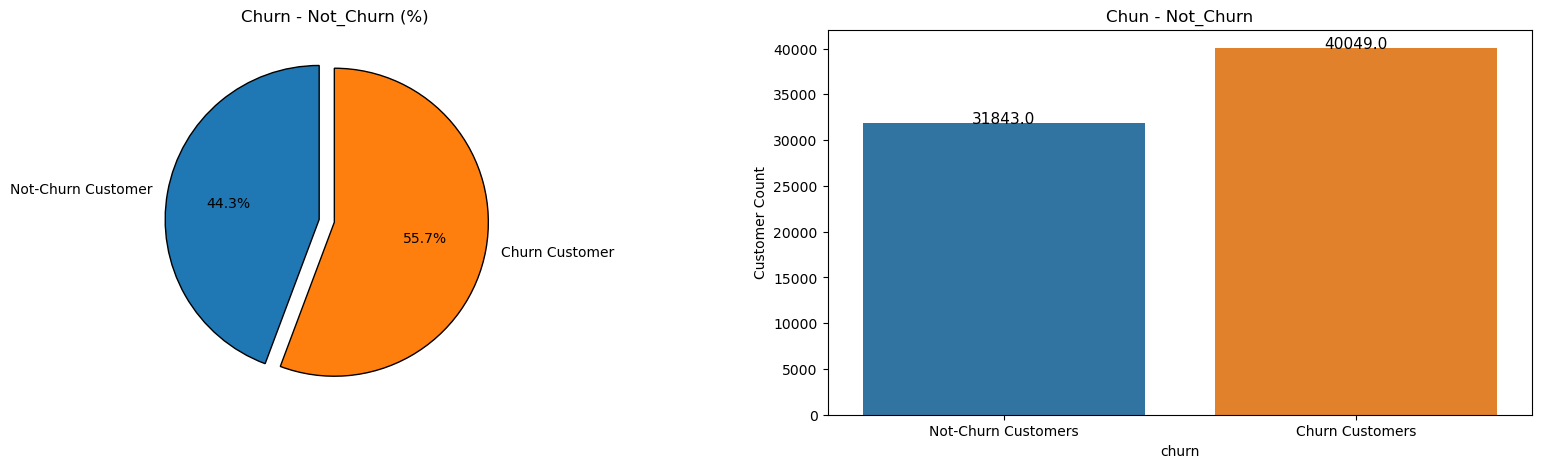

In [8]:
l = list(df_1['churn'].value_counts())
circle = [l[1] / sum(l) * 100, l[0] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['Not-Churn Customer', 'Churn Customer'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),colors = ['#1f77b4', '#ff7f0e'],
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Churn - Not_Churn (%)');

plt.subplot(1,2,2)
ax = sns.countplot(x='churn', data=df_1,palette=['#1f77b4','#ff7f0e'])
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Not-Churn Customers','Churn Customers'])
plt.title("Chun - Not_Churn")
plt.ylabel('Customer Count')
plt.show()

# Churn vs 변수

#### 1. service_faiure_count

In [9]:
df_1 = df.copy()

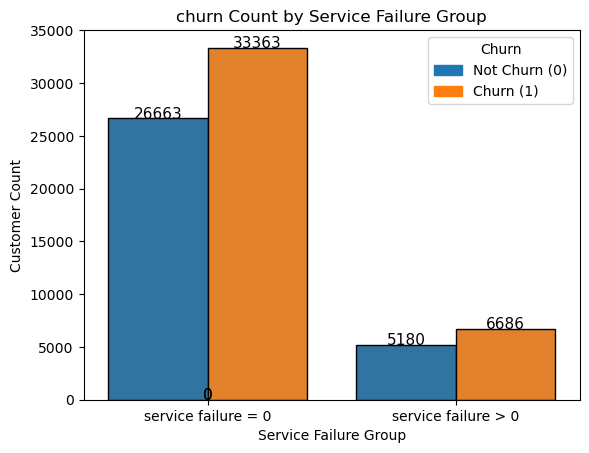

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
df_1['fail_group'] = df_1['service_failure_count'].apply(lambda x: 'service failure = 0' if x == 0 else 'service failure > 0')

# 그룹별 churn 계산
df_plot = df_1.groupby(['fail_group', 'churn']).size().reset_index(name='count')
ax = sns.barplot(x='fail_group', y='count', hue='churn', data=df_plot, edgecolor='black')
for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, int(rect.get_height()), horizontalalignment='center', fontsize = 11)

plt.title('churn Count by Service Failure Group')
plt.xlabel('Service Failure Group')
plt.ylabel('Customer Count')
not_churn_patch = mpatches.Patch(color="#1f77b4", label='Not Churn (0)')
churn_patch = mpatches.Patch(color='#ff7f0e', label='Churn (1)')
plt.legend(handles=[not_churn_patch, churn_patch], title="Churn")
plt.show()


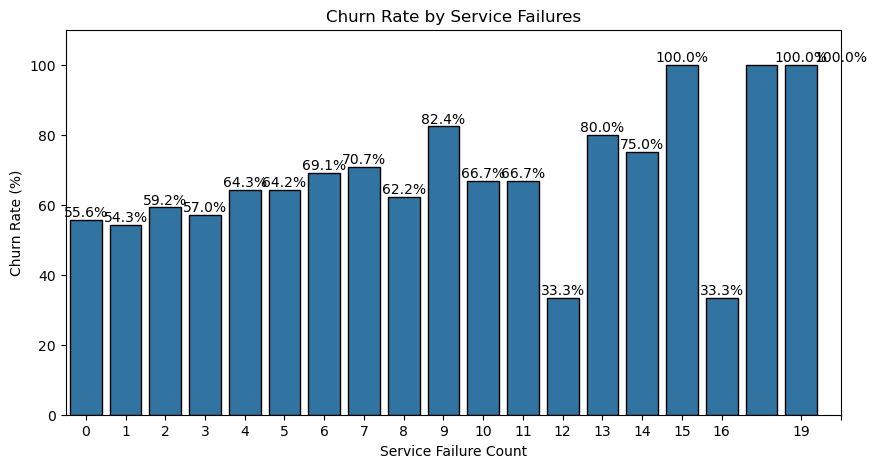

In [11]:
# 서비스 장애 횟수별 이탈 비율
df_rate = df.groupby('service_failure_count')['churn'].mean().reset_index()
df_rate['churn'] = df_rate['churn'] * 100

plt.figure(figsize=(10,5))
sns.barplot(x='service_failure_count', y='churn', data=df_rate, edgecolor='black')

# 값 표시
for index, row in df_rate.iterrows():
    plt.text(row['service_failure_count'], row['churn'] + 1,
             f"{row['churn']:.1f}%", ha='center', fontsize=10)

plt.title('Churn Rate by Service Failures')
plt.xlabel('Service Failure Count')
plt.ylabel('Churn Rate (%)')
plt.xticks(df_rate['service_failure_count'])
plt.ylim(0, df_rate['churn'].max() + 10)
plt.show()

In [12]:
df['service_failure_count'].value_counts()

service_failure_count
0     60026
1      7664
2      2453
3       901
4       395
5       201
6        97
7        58
8        37
9        17
10       15
11        6
12        6
13        5
14        4
16        3
15        2
19        1
18        1
Name: count, dtype: int64

| 서비스 장애 경험 | 이탈률(%) |
|---|---:|
| 장애 경험 없음 (0건) | **55.6%** |
| 장애 경험 있음 (1건 이상) | **56.4%** |
* 서비스 장애가 있든 없든 이탈률 차이는 크지 않음 --> 단순히 서비스 장애 신고한 건수가 있다는 것만으로 이탈이 발생한다고 보긴 어려움.
* 서비스 장애 신고 횟수가 증가할수록 이탈률은 상승하는 경향을 보임. 그러나 신고 횟수가 높은 고객의 수가 매우 적음 --> 이 패턴을 일반화하기에는 통계적 한계가 있다 생각.“신고를 많이 하면 이탈 위험이 높다”고 단정지을 수 없다고 판단됨. 

#### 2. download_over_limit

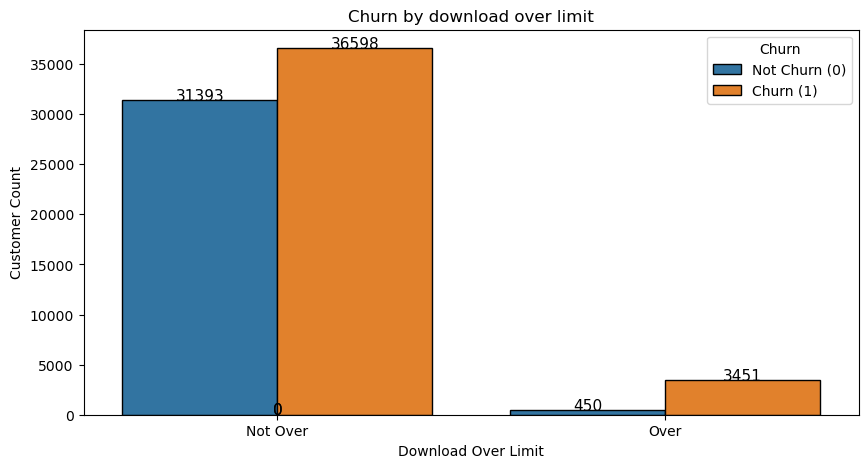

In [13]:
# 0이면 'Not Over', 1 이상이면 'Over'
df_1['over_group'] = df_1['download_over_limit'].apply(lambda x: 'Not Over' if x == 0 else 'Over')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

bx = sns.countplot(
    x='over_group',
    hue='churn',
    data=df_1,
    edgecolor='black'
)
for rect in bx.patches:
        bx.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, int(rect.get_height()), horizontalalignment='center', fontsize = 11)

plt.title('Churn by download over limit')
plt.xlabel('Download Over Limit')
plt.ylabel('Customer Count')
plt.legend(title='Churn', labels=['Not Churn (0)', 'Churn (1)'])
plt.show()



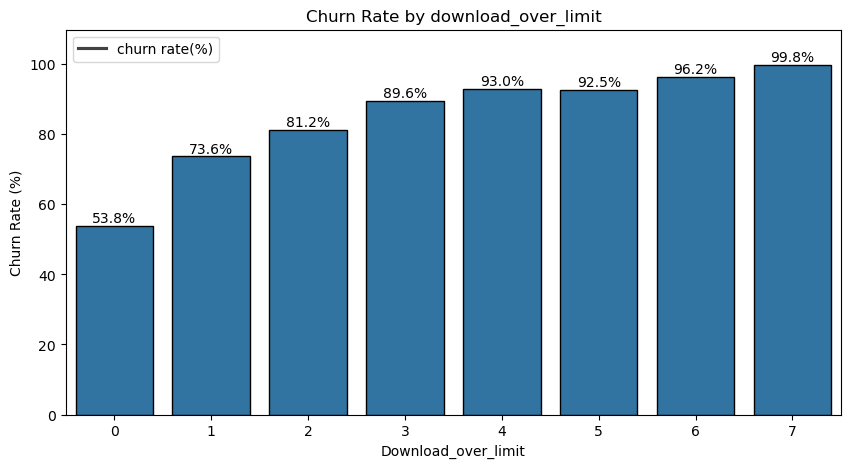

In [14]:
# 다운로드 횟수별 churn비율
df_rate = df.groupby('download_over_limit')['churn'].mean().reset_index()
df_rate['churn'] = df_rate['churn'] * 100
plt.figure(figsize=(10,5))
sns.barplot(x='download_over_limit', y='churn', data=df_rate, edgecolor='black')

# 값 표시
for index, row in df_rate.iterrows():
    plt.text(row['download_over_limit'], row['churn'] + 1,
             f"{row['churn']:.1f}%", ha='center', fontsize=10)

plt.title('Churn Rate by download_over_limit')
plt.xlabel('Download_over_limit')
plt.ylabel('Churn Rate (%)')
plt.xticks(df_rate['download_over_limit'])
plt.ylim(0, df_rate['churn'].max() + 10)
plt.legend(labels=['churn rate(%)'])
plt.show()

| 다운로드 초과 사용 여부 | 이탈률(%) |
|---|---:|
| 초과 사용 없음 | **53.8%** |
| 초과 사용 있음 | **88.5%** |
* 대부분의 고객이 다운로드 한도 초과하지 않음.
* 다운로드 한도 초과 사용 고객은 소수지만, 초과 시 약 88%가 이탈하는 매우 높은 이탈률 보임. --> 초과시 요금부담이 이탈 주요인으로 예상됨
* 고객이 다운로드 초과 사용을 많이 하진 않지만, 초과가 발생하면 이탈 위험이 크게 증가하는 신호로 볼 수 있음.

### 3. contract_type

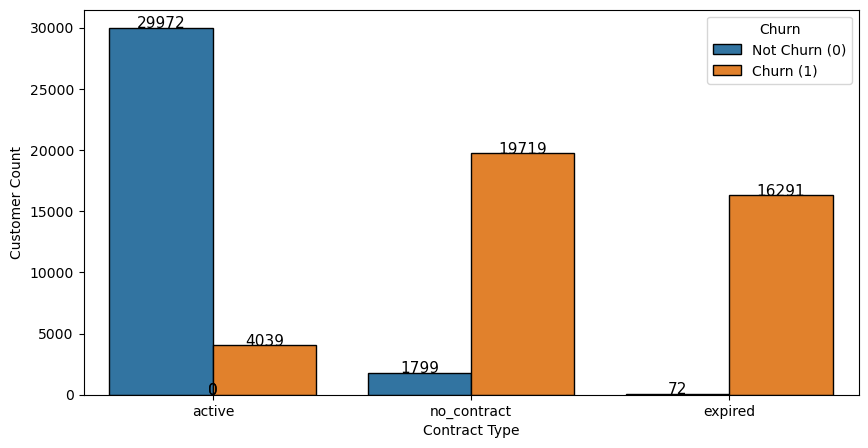

In [15]:
contract_type = ['contract_type_active', 'contract_type_expired', 'contract_type_no_contract']
df_1 = df.copy()
df_1['contract_type'] = df_1[contract_type].idxmax(axis=1).str.replace('contract_type_', '')

plt.figure(figsize=(10,5))

# countplot
import seaborn as sns
cx = sns.countplot(x='contract_type', hue='churn', data=df_1, edgecolor='black')

for rect in cx.patches:
        cx.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, int(rect.get_height()), horizontalalignment='center', fontsize = 11)

plt.xlabel('Contract Type')
plt.ylabel('Customer Count')
plt.legend(title='Churn', labels=['Not Churn (0)', 'Churn (1)'])
plt.show()

| 계약 상태 | 이탈률(%) |
|---|---:|
| 계약 유지 (Active) | **11.9%** |
| 무계약 (No Contract) | **91.6%** |
| 계약 만료 (Expired) | **99.5%** |
* 계약 유지 고객(active) 이탈이 가장 적음. 
* 무계약(no_contract)고객, 계약 만료 고객(expired)의 이탈률 높음.


#### 4. download_usage_range / upload_usage_range

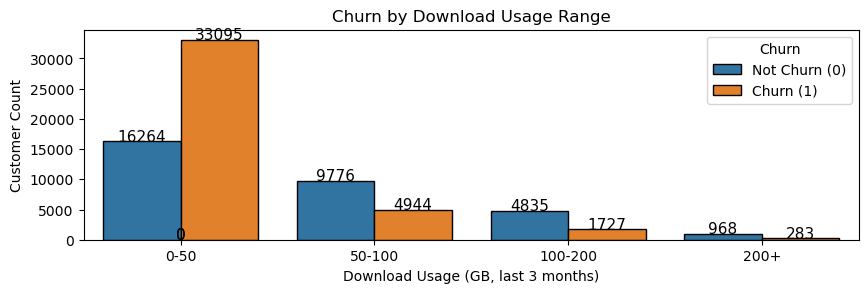

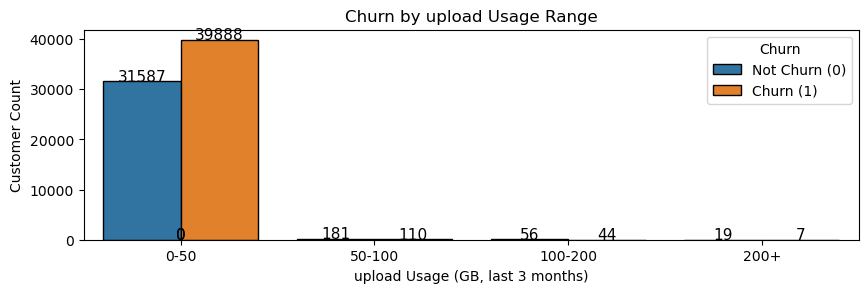

In [16]:
plt.figure(figsize=(10,6))
bins = [0, 50, 100, 200, float('inf')]
labels = ['0-50', '50-100', '100-200', '200+']

plt.subplot(2,1,1)
# download_avg 구간화
df_1['download_bin'] = pd.cut(df_1['download_avg'], bins=bins, labels=labels, right=False)
dx = sns.countplot(x='download_bin', hue='churn', data=df_1, edgecolor='black')

for rect in dx.patches:
        dx.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, int(rect.get_height()), horizontalalignment='center', fontsize = 11)
plt.title('Churn by Download Usage Range')
plt.xlabel('Download Usage (GB, last 3 months)')
plt.ylabel('Customer Count')
plt.legend(title='Churn', labels=['Not Churn (0)', 'Churn (1)'])
plt.show()

plt.figure(figsize=(10,6))
plt.subplot(2,1,2)
# download_avg 구간화
df_1['upload_bin'] = pd.cut(df_1['upload_avg'], bins=bins, labels=labels, right=False)
ex = sns.countplot(x='upload_bin', hue='churn', data=df_1, edgecolor='black')

for rect in ex.patches:
        ex.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, int(rect.get_height()), horizontalalignment='center', fontsize = 11)
plt.title('Churn by upload Usage Range')
plt.xlabel('upload Usage (GB, last 3 months)')
plt.ylabel('Customer Count')
plt.legend(title='Churn', labels=['Not Churn (0)', 'Churn (1)'])
plt.show()

| 다운로드 사용량(GB) | 이탈률 (%) | 업로드 사용량(GB) | 이탈률 (%) |
|---|---:|---|---:|
| 0–50 | **67.1%** | 0–50 | **55.8%** |
| 50–100 | **33.6%** | 50–100 | **37.8%** |
| 100–200 | **26.9%** | 100–200 | **44.0%** |
| 200+ | **22.6%** | 200+ | **26.9%** |
* upload, download 모두 대부분의 고객이 0-50GB 사용 구간에 집중되어 있음. 
* 전체 구간 중 0-50GB 구간에서 이탈 비중이 가장 높고, 유지 고객(이탈x고객)보다 이탈 고객 수가 더 많음.--> 서비스 활용도가 낮은 고객일수록 이탈 가능성이 높은 것으로 예측됨. 
* upload, download 사용량이 높은 고객군에서는 이탈 고객수가 더 적고 유지 고객 수가 더 많다. --> 많이 사용하는 사람일 수록 이탈하지 않는 것으로 예상됨.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

median_table = df.groupby('churn')[['download_avg', 'upload_avg']].median()
print(median_table)



       download_avg  upload_avg
churn                          
0              48.8         3.7
1              11.9         0.9


* churn 고객의 download, upload 중앙값이 더 낮음 --> 이탈한 고객은 데이터 사용량이 더 작다. 

### 5. Subscriber

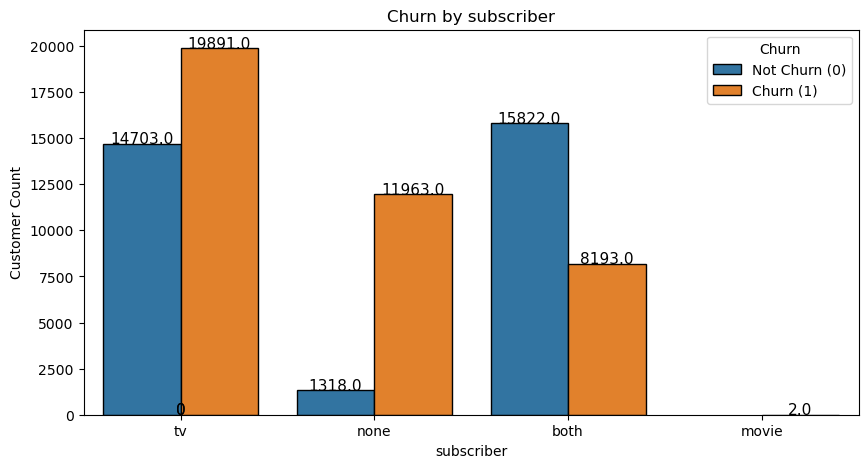

In [18]:
sub_type = ['sub_both', 'sub_movie', 'sub_none', 'sub_tv']
df_1['sub_type'] = df_1[sub_type].idxmax(axis=1).str.replace('sub_', '')

plt.figure(figsize=(10,5))

import seaborn as sns
fx = sns.countplot(x='sub_type', hue='churn', data=df_1, edgecolor='black')
for rect in fx.patches:
        fx.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.title('Churn by subscriber')
plt.xlabel('subscriber')
plt.ylabel('Customer Count')
plt.legend(title='Churn', labels=['Not Churn (0)', 'Churn (1)'])
plt.show()


| 구독 유형 | 이탈률(%) 
|---|---:
| TV only | **57.5%** 
| Movie only | **100%** 
| None (구독 없음) | **90.1%** 
| Both (TV + Movie) | **34.1%** 
* 구독 서비스가 없거나 단일 서비스만 이용하는 고객 이탈률이 높음.
* TV, 영화 서비스 모두 사용하는 고객은 이탈률이 낮음 


#### 6. subscription_age

/var/folders/2x/_p089hqd08j6vdcht5q7h27w0000gn/T/ipykernel_14530/1537327323.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['0-2','2-4','4-6','6-8','8-10','10+'])


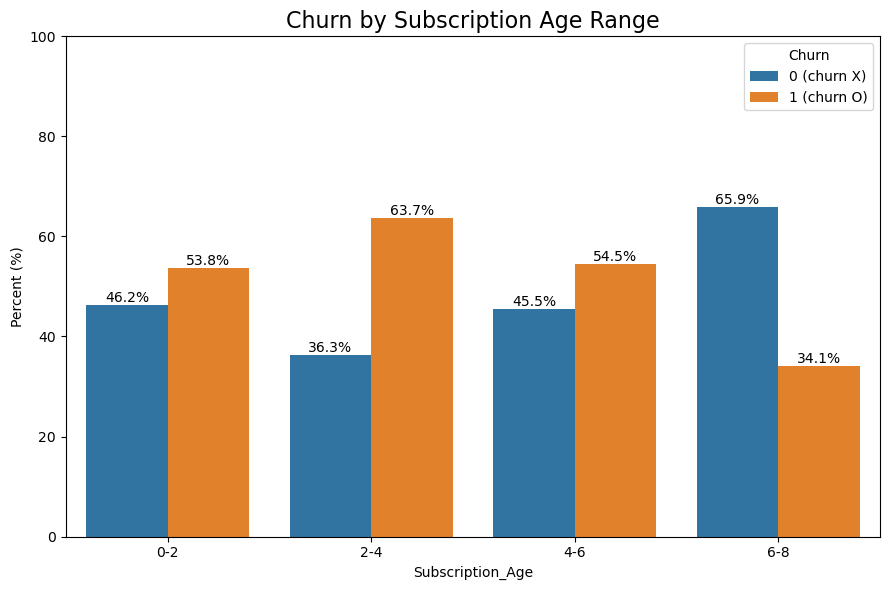

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
df1 = pd.read_csv(r"../../preprocessed_data&EDA/dataset/tree_model_preprocessed.csv")

# churn 라벨
df1['churn_label'] = df1['churn'].map({0:'0 (churn X)', 1:'1 (churn O)'})


grp = df1.groupby(['subscription_age_group', 'churn_label']).size()
tbl = grp.unstack(fill_value=0)
pct = tbl.div(tbl.sum(axis=1), axis=0) * 100
pct = pct.reset_index().melt(id_vars='subscription_age_group', var_name='churn_label', value_name='percent')



# 그래프 그리기
plt.figure(figsize=(9, 6))
ax = sns.barplot(
    data=pct,
    x='subscription_age_group',
    y='percent',
    hue='churn_label',
)

ax.set_xticklabels(['0-2','2-4','4-6','6-8','8-10','10+'])
plt.title('Churn by Subscription Age Range', fontsize=16)
plt.xlabel('Subscription_Age')
plt.ylabel('Percent (%)')
plt.ylim(0, 100)
plt.legend(title='Churn')

# 막대 위 수치 표시
for p in plt.gca().patches:
    h = p.get_height()
    if np.isfinite(h) and h > 0:
        plt.text(p.get_x() + p.get_width()/2, h, f'{h:.1f}%', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
warnings.filterwarnings('ignore')
plt.show()

* 가입후 2년~4년 구간 이탈률이 가장 높음(이탈 위험 구간) -> 사용 경험이 생기고 서비스 가치 판단 할 수 있어 이탈률이 높은것으로 예측됨. 
* 장기 사용자일 수록 이탈률 감소함. -> 일정 기간을 넘긴 고객은 이탈하지 않음을 예측할 수 있음. 

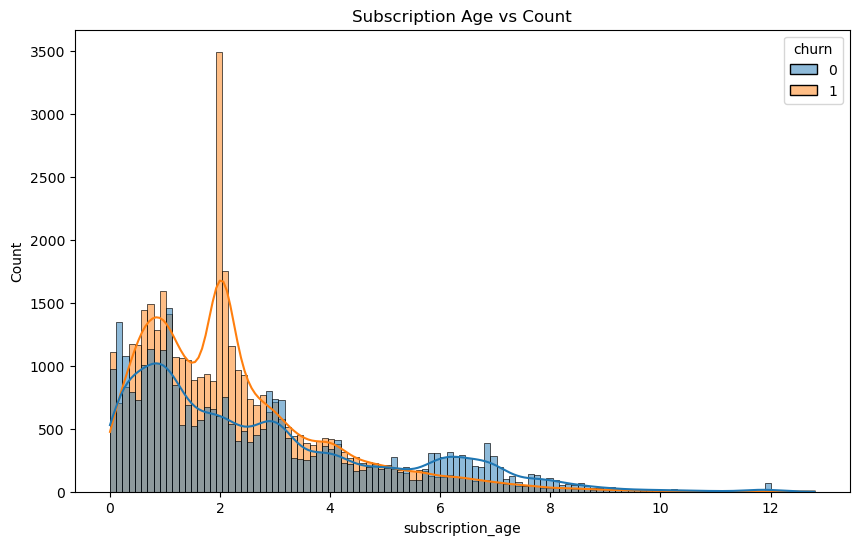

In [21]:
plt.figure(figsize = (10,6))
sns.histplot(data = df_1, x= 'subscription_age', kde = True, hue = 'churn')
plt.title('Subscription Age vs Count')
plt.show()

* 2년에서 가장 많이 이탈함. 
* 6년 이상은 이탈을 거의하지 않음

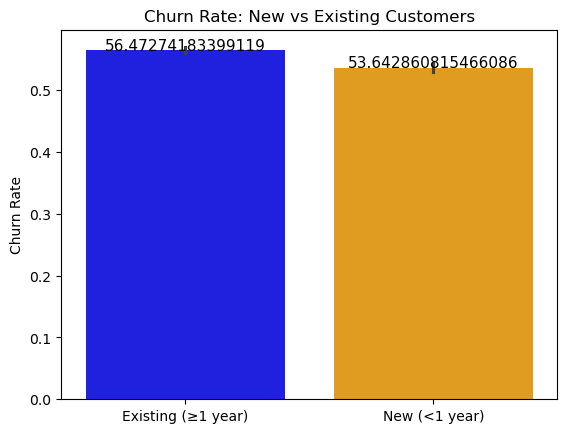

In [22]:
df_1['new_customer'] = (df_1['subscription_age'] < 1).astype(int)
gx = sns.barplot(
    data=df_1,
    x='new_customer',
    y='churn',
    palette=['blue', 'orange']
)
for rect in gx.patches:
        gx.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height() * 100, horizontalalignment='center', fontsize = 11)
plt.title("Churn Rate: New vs Existing Customers")
plt.xticks([0,1], ['Existing (≥1 year)', 'New (<1 year)'])
plt.ylabel("Churn Rate")
plt.xlabel("")
plt.show()

* 신규 가입자와 기존 가입자 이탈률 차이 거의 없음. 기존 가입자의 비율이 약간더 높음

### bill_avg

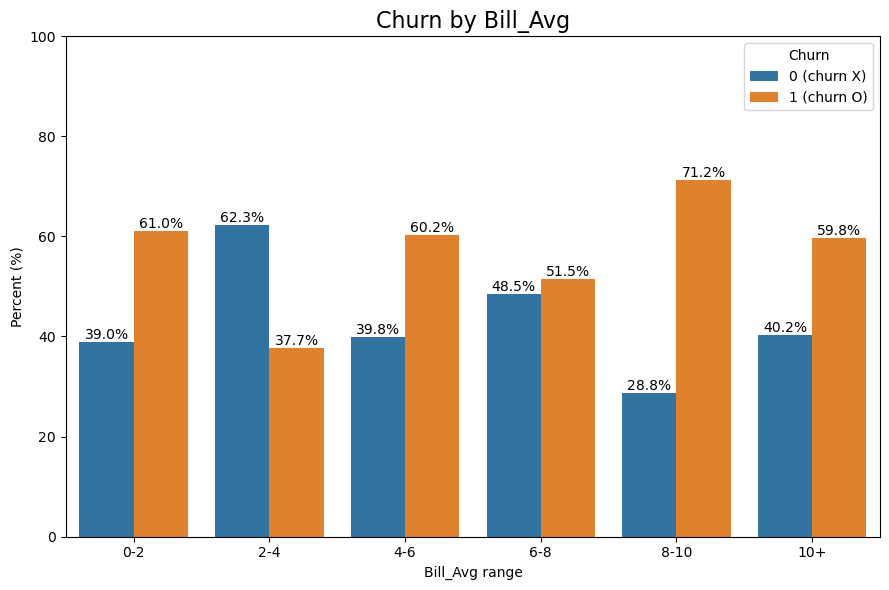

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

# bill_avg를 5개 구간 나눠서 5등분
bill_bins = pd.qcut(df1['bill_avg'], q=6, duplicates='drop')
df1['bill_bin'] = bill_bins.cat.codes + 1  # 1~5 구간

# churn 라벨
df1['churn_label'] = df1['churn'].map({0:'0 (churn X)', 1:'1 (churn O)'})

grp = df1.groupby(['bill_bin', 'churn_label']).size()
tbl = grp.unstack(fill_value=0)
pct = tbl.div(tbl.sum(axis=1), axis=0) * 100
pct = pct.reset_index().melt(id_vars='bill_bin', var_name='churn_label', value_name='percent')

# 그래프
plt.figure(figsize=(9, 6))
ax = sns.barplot(
    data=pct,
    x='bill_bin',
    y='percent',
    hue='churn_label',
)

ax.set_xticklabels(['0-2','2-4','4-6','6-8','8-10','10+'])
plt.title('Churn by Bill_Avg', fontsize=16)
plt.xlabel('Bill_Avg range')
plt.ylabel('Percent (%)')
plt.ylim(0, 100)
plt.legend(title='Churn', loc='upper right')
# 막대 위 수치 표시
for p in plt.gca().patches:
    h = p.get_height()
    if np.isfinite(h) and h > 0:
        plt.text(p.get_x() + p.get_width()/2, h, f'{h:.1f}%', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
warnings.filterwarnings('ignore')
plt.show()

In [24]:
bill_bins = pd.qcut(df1['bill_avg'], q=6, duplicates='drop')
df1['bill_bin'].value_counts()# 1~5 구간

bill_bin
4    17482
1    15694
2    11343
6    11125
3     9443
5     6805
Name: count, dtype: int64

* 3개월 평균 청구 금액이 2-4만원대일 경우 유지율이 가장 높음 -> 합리적인 요금대 고객이 이탈률이 낮음을 예측할 수 있음
* 저가(0-2) , 중고가(4-8) 구간 이탈률 높음 -> 저가 : 경쟁사 이동 쉬움. 중고가 : 가격 대비 가치 없다 판단 할 수 있음. 
* 고가(8-10) 이탈률 급등


| 변수 | Churn 패턴 | 해석 |
|---|---|---|
| **service_failure_count** | 장애 신고 여부에 따른 이탈률 차이가 거의 없음 | 장애 신고가 있다고 해서 이탈로 이어진다고 보기 어려움 |
| **download_over_limit** | 초과 사용 고객 이탈률 매우 높음 | 데이터 초과 시 요금 부담 등으로 이탈 가능성 증가 |
| **contract_type** | Active 고객 이탈률 매우 낮음 / 무계약·만료 고객 이탈률 매우 높음 | 계약 유지 여부가 이탈 방지에 매우 중요한 요소 |
| **download_avg / upload_avg** | 사용량이 낮을수록 이탈률 높음 | 서비스 이용 빈도가 낮은 고객일수록 이탈 가능성 높음 |
| **subscriber_type** | 구독 없음·단일 구독 고객 이탈률 높음 / TV+Movie 구독 고객 이탈률 낮음 | 다양한 서비스를 이용할수록 서비스 유지 가능성 높음 |
| **subscription_age** | 2–4년 고객 이탈률 가장 높음 / 장기 고객일 수록 이탈 낮아짐 | 일정 기간 사용 후 서비스 평가가 이뤄지며 이탈 발생 가능 |
| **bill_avg** | 중간 요금대 이탈률 낮음 / 저가·고가 요금대 이탈률 높음 | 가격 대비 가치 판단 영향 → 너무 낮거나 높은 요금대는 이탈 증가 |


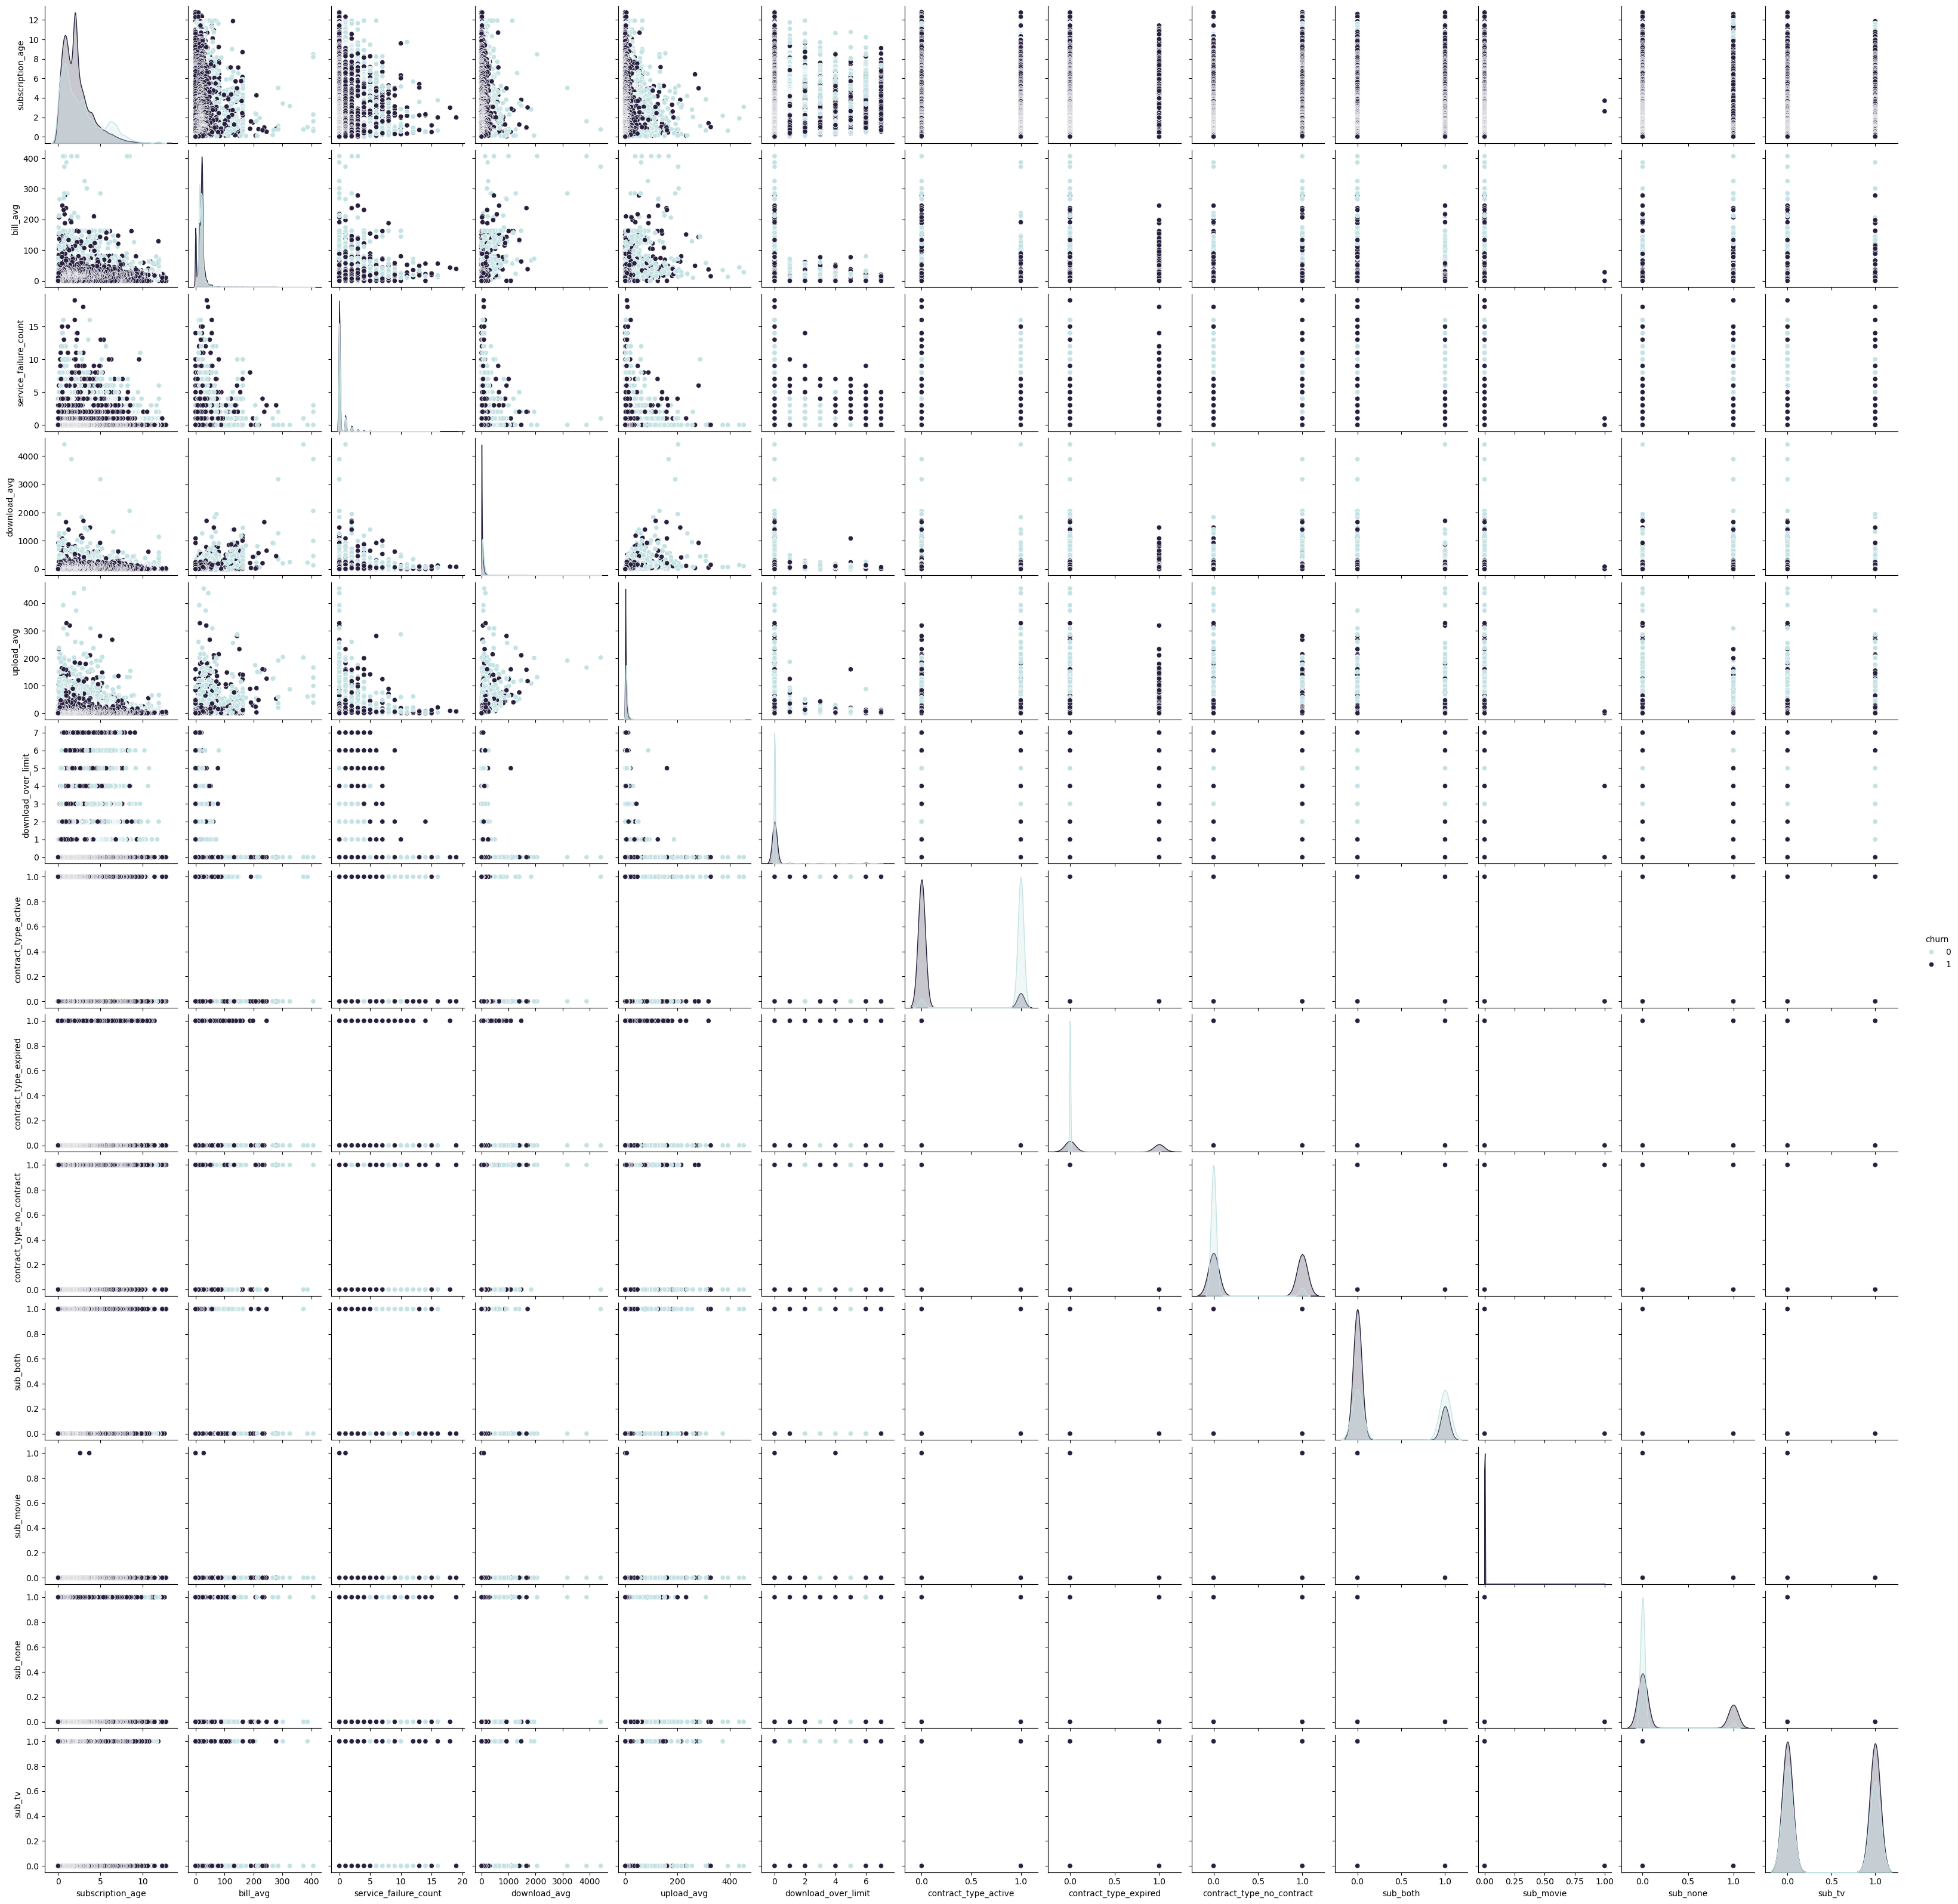

In [25]:
# pairplot
df.dropna()
sns.pairplot(df, hue = 'churn', palette= 'ch:start=.2,rot=-.3') 